# Random Forest Model
##### Authors: Diego Senso González, Luis Vaciero
##### 11 december 2020
##### Module: Machine Learning - Master's Degree Data Science for Finance

## Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib
from matplotlib import pyplot as plt
from scipy import stats as sts
from sklearn import model_selection
from sklearn import linear_model
from sklearn import metrics
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.ensemble import IsolationForest
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from math import sqrt
import itertools
import math
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import roc_curve, roc_auc_score, plot_roc_curve
from sklearn.datasets import make_classification
import random
random.seed(1234)
from sklearn.impute import KNNImputer
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pickle
import scikitplot as skplt
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import pydotplus
from IPython.display import Image
from sklearn import tree
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
import pickle
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
import plotly.express as px

## READING THE DATA

### We import the cleaned dataset 

In [77]:
loan = pd.read_csv("../notebooks/loan_lasso.csv", delimiter = ',')

### We see the shape of the Dataframe

In [78]:
print('The shape of our features is:', loan.shape)

The shape of our features is: (462225, 25)


### When generating the new Cleaned Dataset a new column was created, as a new index, so we drop it.

In [79]:
loan = loan.drop(loan.columns[[0]], axis='columns')

# Random Forest

Classification with Random Forests involves the random construction of a large number of decision trees on the same set of data, and the final classification decision is made by calculating the vote of most of the predictions offered by each of the trees that make up the forest.

### We separate our dummy variable from the rest of the dataset, in order to start predicting our model.

In [80]:
# endogena

endogena = ['loan_status'] 

# exogenas

exogenas = list(set(list(loan.columns))-set(endogena))

X = loan[exogenas].values

Y = loan[endogena].values

### We split the dataset into two parts, train and test

We also apply Smote to balance the new dataset. Smote function creates synthetic samples of the minority class making the minority class equal to the majority class.

In [81]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=40)
sm = SMOTE(random_state=40, sampling_strategy = 0.4)
X_train, Y_train = sm.fit_sample(X_train, Y_train)
print(X_train.shape); print(X_test.shape)

(387126, 23)
(92445, 23)


### We convert the variables depending if they are Numeric or Categorical

In [82]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

### Apply the transformations to the correct columns in the dataframe 

In [83]:
numeric_features = loan.select_dtypes(include=['int64', 'float64']).columns
categorical_features = loan.select_dtypes(include=['object']).columns
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

## Hyperparameter Optimization

We will optimize the hyperparameters in order to get the best possible Random Forest model. 

In [85]:
def train_hyper_tune(X,y):
    # create the pre-processing component
    my_scaler = StandardScaler()
    my_imputer = SimpleImputer(strategy="median")
    
    # define classifiers
    ## Classifier : Random Forest Classifier
    clf_RF = RandomForestClassifier(random_state=0)
    
    # define pipeline 
    ## clf_RF
    pipe = Pipeline([('imputer', my_imputer), ('scaler', my_scaler), ('rf_model',clf_RF)])
    
    # create hyperparameter space 
    ## clf_RF
    param_grid = {
        'rf_model__n_estimators' : [50,100],
        'rf_model__max_features' : [0.8,"auto"],
        'rf_model__max_depth' : [4,5]
    }
    
    
    # set GridSearch via 5-fold cross-validation
    ## clf_RF
    grid = GridSearchCV(pipe, cv=5, param_grid=param_grid)
    
    # run the hyperparameter tunning
    grid.fit(X_train, Y_train)
    
    # return results of the tunning process
    return grid,pipe

In [86]:
my_grid,my_pipe= train_hyper_tune(X_train, Y_train)

In [64]:
def train_on_entire(X,Y,pipe,grid_res):
    # fit pipeline
    pipe.set_params(**grid_res.best_params_).fit(X, Y)
    # return the newly trained pipeline
    return pipe
my_entire_pipe = train_on_entire(X_train,Y_train,my_pipe,my_grid)

In [65]:
my_entire_pipe.score(X_test, Y_test)

0.7492130455946779

## Model output

In [69]:
print(confusion_matrix(Y_test,Y_pred_gsearch_RandomForest2))
print(classification_report(Y_test,Y_pred_gsearch_RandomForest2))

[[ 1481 22011]
 [ 1173 67780]]
              precision    recall  f1-score   support

         0.0       0.56      0.06      0.11     23492
         1.0       0.75      0.98      0.85     68953

    accuracy                           0.75     92445
   macro avg       0.66      0.52      0.48     92445
weighted avg       0.70      0.75      0.67     92445



# ROC Curve

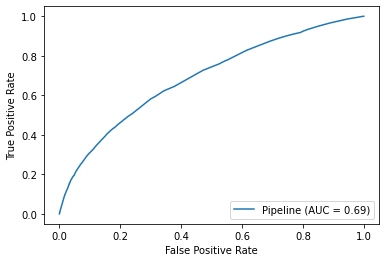

Logistic Regression score train:  0.7367782065787366
Logistic Regression score:  0.7492130455946779


In [88]:
metrics.plot_roc_curve(my_entire_pipe, X_test, Y_test)
plt.show()                    
print("Logistic Regression score train: ", my_entire_pipe.score(X_train, Y_train))
print("Logistic Regression score: ", my_entire_pipe.score(X_test, Y_test))

We see that have obtainen 74.92% of accuracy in this model. It is not a bad result, but we will have to see if this is good predicting new datasets which we do not have yet. Using "pickle" we can save the model to do this later.

# Normalized Confusion Matrix

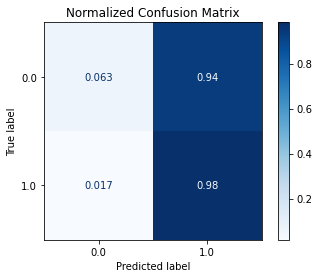

In [92]:
disp = plot_confusion_matrix(my_entire_pipe, X_test, Y_test,
                            cmap=plt.cm.Blues, normalize = 'true') #Confusion Matrix
plt.title('Normalized Confusion Matrix'); #Plot title

The model is very good at predicting payments, but very bad at trying to predict defaults.

# Saving model

In [90]:
#We import pickle to save the model and use it later with new data
import pickle
filename = 'randomforest.sav'
pickle.dump(my_entire_pipe, open (filename, 'wb'))
model_randomforest = pickle.load(open('randomforest.sav', 'rb'))
model_randomforest

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler()),
                ('rf_model',
                 RandomForestClassifier(max_depth=5, max_features=0.8,
                                        random_state=0))])

# Loading the model

In [74]:
#Load model and obtain accuracy for new dataset
model = pickle.load(open('randomforest.sav', 'rb'))
result = model.score(X_test, Y_test)
print("Accuracy: %.2f%%" % (result * 100.0))

Accuracy: 74.92%


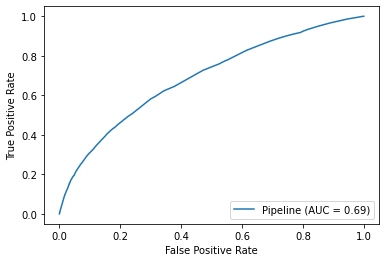

Random Forest score train:  0.7367782065787366
Random Forest score:  0.7492130455946779


In [107]:
metrics.plot_roc_curve(model, X_test, Y_test)
plt.show()                    
print("Random Forest score train: ", model.score(X_train, Y_train))
print("Random Forest score: ", model.score(X_test, Y_test))

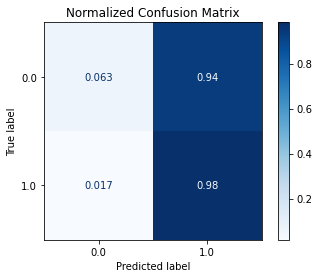

In [73]:
disp = plot_confusion_matrix(model_randomforest, X_test, Y_test,
                            cmap=plt.cm.Blues, normalize = 'true') #Confusion Matrix
plt.title('Normalized Confusion Matrix'); #Plot title